## Μέθοδος απαλοιφής Gauss - Gaussian elimination function

### 
Σε αυτό το παράδειγμα, ορίζουμε τον πίνακα συντελεστών Α και το σταθερό διάνυσμα Β που αντιπροσωπεύει ένα σύστημα γραμμικών εξισώσεων. Η συνάρτηση gaussian_elimination υλοποιεί τη μέθοδο Gaussian elimination για την επίλυση του συστήματος.

In [3]:
import numpy as np

def gaussian_elimination(A, B):
    """
    Solves a system of linear equations using Gaussian elimination method.

    Parameters:
    - A: Coefficient matrix of the linear system.
    - B: Constant vector of the linear system.

    Returns:
    - The solution vector of the linear system.
    """
    n = len(A)

    # Forward elimination
    for i in range(n-1):
        # Perform row operations to eliminate variables below the current row
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]  # Compute the factor by dividing the current row's pivot element
            A[j, i:] -= factor * A[i, i:]  # Update the elements of the current row
            B[j] -= factor * B[i]  # Update the corresponding element of the constant vector

    # Back substitution
    X = np.zeros(n, dtype=float)  # Specify the data type as float
    X[-1] = B[-1] / A[-1, -1]  # Solve for the last variable

    for i in range(n-2, -1, -1):
        # Solve for the remaining variables by substituting the known values
        X[i] = (B[i] - np.dot(A[i, i+1:], X[i+1:])) / A[i, i]

    return X

# Example: Solving a system of linear equations using Gaussian elimination

# Coefficient matrix (with float data type)
A = np.array([[2.0, -1.0, 1.0],
              [4.0, 3.0, -1.0],
              [3.0, -1.0, 2.0]])

# Constant vector (with float data type)
B = np.array([4.0, 2.0, 6.0])

# Solve the system using Gaussian elimination
solution = gaussian_elimination(A, B)

print("Solution:", solution)

Solution: [ 1.25 -0.75  0.75]


/tmp/ipykernel_414232/1757078934.py:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, (B[2] - A[2, 0] * x - A[2, 2]) / A[2, 1], label="3x - y + 2z = 6")


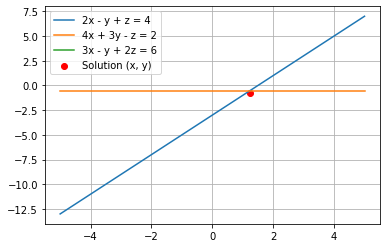

In [4]:
import matplotlib.pyplot as plt


# Plot the equations as lines
x = np.linspace(-5, 5, 100)
plt.plot(x, (B[0] - A[0, 0] * x - A[0, 2]) / A[0, 1], label="2x - y + z = 4")
plt.plot(x, (B[1] - A[1, 0] * x - A[1, 2]) / A[1, 1], label="4x + 3y - z = 2")
plt.plot(x, (B[2] - A[2, 0] * x - A[2, 2]) / A[2, 1], label="3x - y + 2z = 6")

# Plot the solution point
plt.scatter(solution[0], solution[1], color='red', marker='o', label="Solution (x, y)")

plt.legend()
plt.grid(True)
plt.show()